Importing Data

In [2]:
import os

In [3]:
com_data="Audio_Combined_Actors_01-24"
data=os.listdir(com_data)
print(data)

['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', '.DS_Store', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', '.ipynb_checkpoints', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


In [4]:
len(data)

26

In [5]:
data.remove('.DS_Store')

In [6]:
data.remove('.ipynb_checkpoints')

In [7]:
len(data)

24

Pre-Processing

In [9]:
file_emotion=[]
file_path=[]
for i in data:
    actor=os.listdir(com_data+'/'+i)
    for f in actor:
        part=f.split('.')[0].split('-')
        file_emotion.append(int(part[2]))
        file_path.append(com_data+'/'+i+'/'+f)

In [10]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-08-01-02-01-08.wav
03
Audio_Combined_Actors_01-24/Actor_16/03-01-05-01-02-01-16.wav
1
03-01-01-01-02-02-08.wav


In [11]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
emotion_df=pd.DataFrame(file_emotion,columns=['Emotions'])
path_df=pd.DataFrame(file_path,columns=['Path'])
df=pd.concat([emotion_df, path_df],axis=1)
df['Emotions'].replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)

/var/folders/24/l6x0hdsx0z75kslgzbwj1_cw0000gn/T/ipykernel_80918/3436433889.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Emotions'].replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)


In [13]:
print(df.head())

  Emotions                                               Path
0    angry  Audio_Combined_Actors_01-24/Actor_16/03-01-05-...
1    happy  Audio_Combined_Actors_01-24/Actor_16/03-02-03-...
2     fear  Audio_Combined_Actors_01-24/Actor_16/03-01-06-...
3     fear  Audio_Combined_Actors_01-24/Actor_16/03-01-06-...
4    happy  Audio_Combined_Actors_01-24/Actor_16/03-02-03-...


In [14]:
print(df['Emotions'].value_counts())

Emotions
angry       376
happy       376
fear        376
calm        376
sad         376
disgust     192
surprise    192
neutral     188
Name: count, dtype: int64


In [15]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0, 'Emotions')

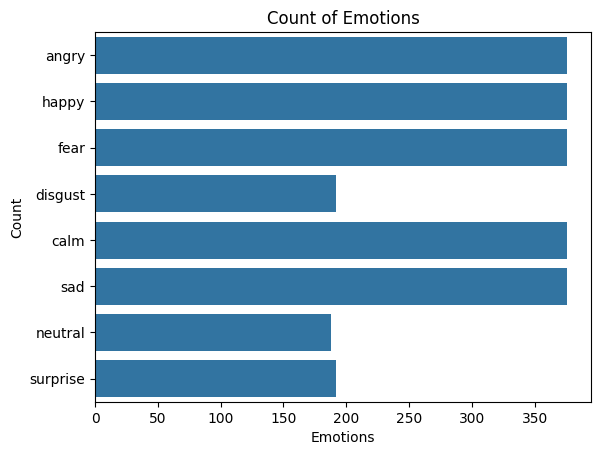

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Count of Emotions')
sns.countplot(df['Emotions'])
plt.ylabel('Count')
plt.xlabel('Emotions')

In [17]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [18]:
import librosa

In [19]:
ex_1,sr=librosa.load(file_path[0])

In [20]:
sr

22050

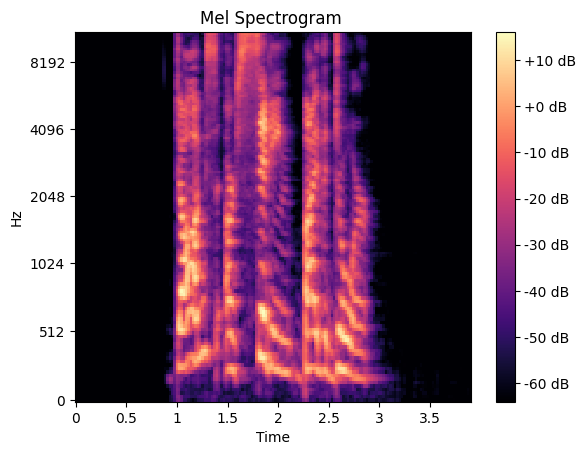

In [21]:
spectrogram=librosa.feature.melspectrogram(y=ex_1,sr=sr,n_mels=128,fmax=8000) 
log_spectrogram=librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

Data Augmentation 

In [23]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
def noise(audio):
    noise_amp=0.035*np.random.uniform()*np.amax(audio)
    audio=audio+noise_amp*np.random.normal(size=audio.shape[0])
    return audio

def stretch(audio,rate=0.8):
    return librosa.effects.time_stretch(audio,rate=rate)

def shift(audio):
    shift_range=int(np.random.uniform(low= -5,high=5)*1000)
    return np.roll(audio,shift_range)

def pitch(audio,sampling_rate,pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=audio,sr=sampling_rate,n_steps=pitch_factor)

In [25]:
import IPython.display as ipd

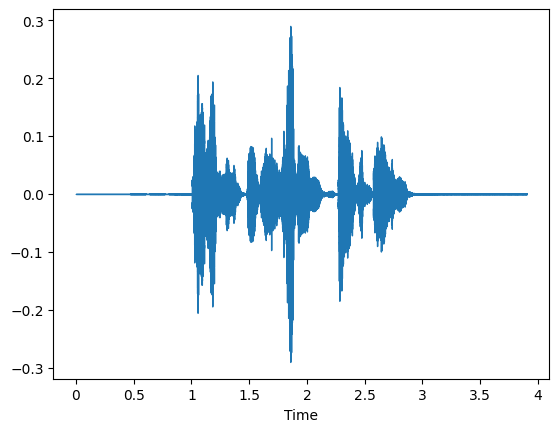

In [26]:
# NORMAL AUDIO
import librosa.display
librosa.display.waveshow(y=ex_1,sr=sr)
ipd.Audio(ex_1,rate=sr)

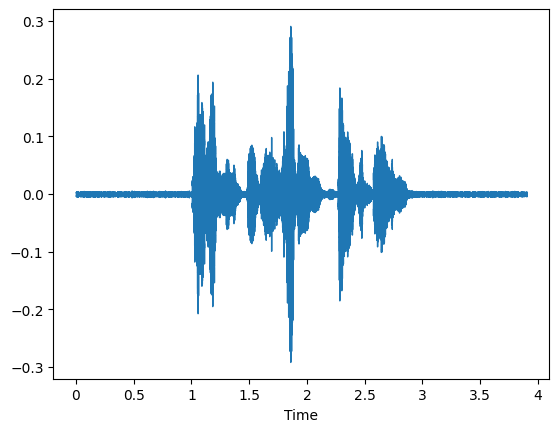

In [27]:
# AUDIO WITH NOISE
x=noise(ex_1)
librosa.display.waveshow(y=x,sr=sr)
ipd.Audio(x,rate=sr)

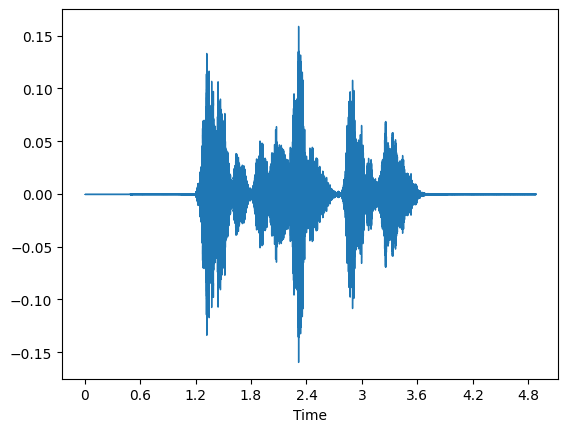

In [28]:
# STRETCHED AUDIO
x=stretch(ex_1)
librosa.display.waveshow(y=x,sr=sr)
ipd.Audio(x,rate=sr)

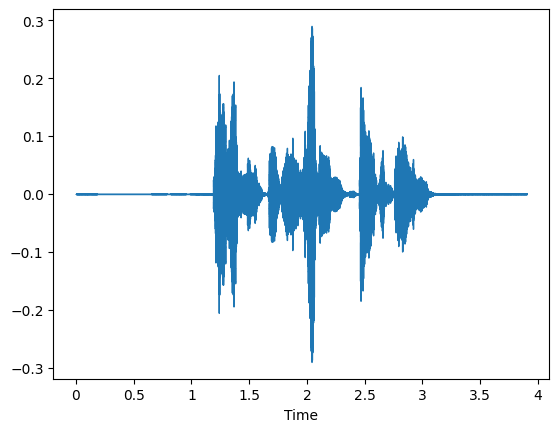

In [29]:
# SHIFTED AUDIO
x=shift(ex_1)
librosa.display.waveshow(y=x,sr=sr)
ipd.Audio(x,rate=sr)

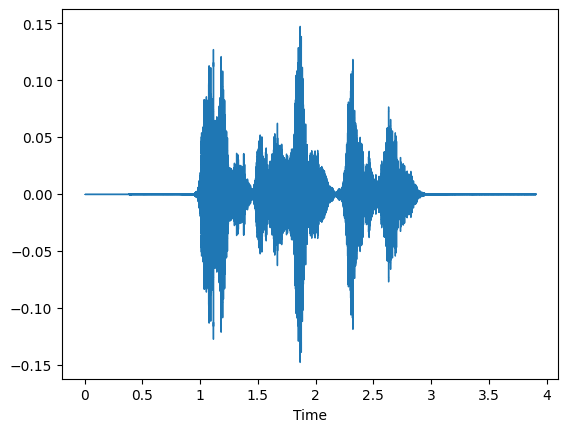

In [30]:
# AUDIO WITH PITCH
x=pitch(ex_1,sr)
librosa.display.waveshow(y=x,sr=sr)
ipd.Audio(x,rate=sr)

Feature Extraction

In [32]:
def zcr(audio,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(audio,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
    
def rmse(audio,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=audio,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
    
def mfcc(audio,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=audio,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(audio,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    result=np.hstack((result,zcr(audio,frame_length,hop_length),rmse(audio,frame_length,hop_length),mfcc(audio,sr,frame_length,hop_length)))
    return result

def get_features(path,duration=2.5,offset=0.6):
    audio,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(audio)
    audio_f=np.array(aud)
    
    noised_audio=noise(audio)
    aud2=extract_features(noised_audio)
    audio_f=np.vstack((audio_f,aud2))
    
    pitched_audio=pitch(audio,sr)
    aud3=extract_features(pitched_audio)
    audio_f=np.vstack((audio_f,aud3))
    
    pitched_audio1=pitch(audio,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio_f=np.vstack((audio_f,aud4))
    
    return audio_f

Way to get features

In [34]:
df

,Emotions,Path
0,angry,Audio_Combined_Actors_01-24/Actor_16/03-01-05-...
1,happy,Audio_Combined_Actors_01-24/Actor_16/03-02-03-...
2,fear,Audio_Combined_Actors_01-24/Actor_16/03-01-06-...
3,fear,Audio_Combined_Actors_01-24/Actor_16/03-01-06-...
4,happy,Audio_Combined_Actors_01-24/Actor_16/03-02-03-...
...,...,...
2447,sad,Audio_Combined_Actors_01-24/Actor_08/03-02-04-...
2448,calm,Audio_Combined_Actors_01-24/Actor_08/03-01-02-...
2449,calm,Audio_Combined_Actors_01-24/Actor_08/03-01-02-...
2450,sad,Audio_Combined_Actors_01-24/Actor_08/03-02-04-...


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['Path'],df['Emotions'],test_size=0.2,stratify=df['Emotions'],random_state=42)

In [36]:
X_train.shape

(1961,)

In [37]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [38]:
from tqdm import tqdm
A_train,B_train=[],[]
for path,emotion,index in tqdm(zip(X_train,y_train,range(len(X_train)))):
    features=get_features(path)  
    if index%500==0:
        print(f'{index} training audio has been processed')
    for i in features:
        A_train.append(i)
        B_train.append(emotion)

0it [00:00, ?it/s]

0 training audio has been processed


503it [00:21, 18.72it/s]

500 training audio has been processed


1003it [00:45, 21.67it/s]

1000 training audio has been processed


1504it [01:11, 17.01it/s]

1500 training audio has been processed


1961it [01:39, 19.71it/s]


In [39]:
X_test.shape

(491,)

In [40]:
A_test,B_test=[],[]
for path,emotion,index in tqdm(zip(X_test,y_test,range(len(X_test)))):
    audios,sr=librosa.load(path,duration=2.5,offset=0.6)
    features=extract_features(audios,sr)  
    if index%100==0:
        print(f'{index} test audio has been processed')
    A_test.append(features)
    B_test.append(emotion)

28it [00:00, 136.56it/s]

0 test audio has been processed


126it [00:00, 131.10it/s]

100 test audio has been processed


225it [00:01, 136.08it/s]

200 test audio has been processed


313it [00:02, 79.32it/s] 

300 test audio has been processed


415it [00:03, 126.44it/s]

400 test audio has been processed


491it [00:04, 117.54it/s]


In [41]:
len(A_train),len(B_train),len(A_test),len(B_test)

(7844, 7844, 491, 491)

Saving Features

In [43]:
Emotions_train=pd.DataFrame(A_train)
Emotions_train['Emotions']=B_train
Emotions_test=pd.DataFrame(A_test)
Emotions_test['Emotions']=B_test
Emotions_train.shape

(7844, 2377)

In [44]:
Emotions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Columns: 2377 entries, 0 to Emotions
dtypes: float64(2376), object(1)
memory usage: 142.3+ MB


In [45]:
Emotions_train.isnull().any(axis=1).sum()

56

In [46]:
Emotions_test.isnull().any(axis=1).sum()

1

In [47]:
Emotions_train.fillna(0,inplace=True)
Emotions_test.fillna(0,inplace=True)

In [48]:
Emotions_train.isnull().any(axis=1).sum()

0

In [49]:
Emotions_test.isnull().any(axis=1).sum()

0

Data Preparation

In [51]:
Emotions_train

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.148438,0.228516,0.309570,0.326172,0.328613,0.342773,0.404297,0.489746,0.538574,0.619629,...,0.949992,-13.812668,-5.971089,-5.704749,6.899563,-21.657019,-2.484066,5.413602,-12.859469,fear
1,0.252930,0.370117,0.493164,0.498047,0.503906,0.508789,0.506348,0.498535,0.485352,0.491699,...,-4.671329,-4.412279,1.146503,-1.479103,-2.277804,-1.838576,-3.304927,-5.026797,-0.757059,fear
2,0.140625,0.202637,0.273438,0.267090,0.253418,0.260254,0.279785,0.310059,0.329590,0.337891,...,4.747156,-13.861881,-2.237984,-1.409461,2.872260,-19.581570,4.306528,0.349865,-1.281247,fear
3,0.226562,0.347168,0.480957,0.500000,0.503906,0.504883,0.504395,0.501465,0.505859,0.499023,...,-5.332081,3.210155,-5.207740,-1.648224,-1.738175,-6.903886,1.492872,1.603034,4.198254,fear
4,0.143555,0.284180,0.330078,0.405762,0.603027,0.684082,0.844727,0.797852,0.664551,0.629395,...,5.861260,1.163468,3.607194,7.379939,6.018937,-2.024609,-1.304543,-4.211392,-0.790762,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,0.250488,0.354980,0.478516,0.458008,0.424316,0.419434,0.414551,0.414551,0.414551,0.408203,...,-2.666360,-6.442180,-5.037323,-1.085024,-3.680975,-1.652606,-1.518071,-2.923323,-0.656331,neutral
7840,0.274902,0.358398,0.414551,0.358887,0.244141,0.208984,0.214844,0.220703,0.235352,0.243652,...,2.616935,2.659783,2.841572,3.144591,3.262635,2.997565,2.535135,2.220616,2.135918,surprise
7841,0.234863,0.360352,0.489746,0.489746,0.500488,0.493652,0.492676,0.501953,0.492188,0.496094,...,-2.612442,1.257476,2.226736,-0.006971,3.049378,-0.470516,-2.989966,1.983113,3.134242,surprise
7842,0.112305,0.151855,0.195312,0.171387,0.183594,0.199219,0.204590,0.217773,0.225586,0.226562,...,2.372968,2.272961,2.273415,2.292302,2.140963,1.810791,1.515185,1.419139,1.437433,surprise


In [52]:
C_train=Emotions_train.iloc[: ,:-1].values
D_train=Emotions_train['Emotions'].values
C_test=Emotions_test.iloc[: ,:-1].values
D_test=Emotions_test['Emotions'].values

In [53]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
ohe=OneHotEncoder()
D_train=ohe.fit_transform(np.array(D_train).reshape(-1,1)).toarray()

In [54]:
D_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [55]:
D_test=ohe.transform(np.array(D_test).reshape(-1,1)).toarray()

In [56]:
D_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [57]:
ss=StandardScaler()
C_train=ss.fit_transform(C_train)
C_test=ss.transform(C_test)

CNN Model

In [59]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Flatten,Dropout,Conv1D,MaxPool1D,AvgPool1D

In [60]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stop=EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [61]:
C_traincnn=np.expand_dims(C_train,axis=2)
C_testcnn=np.expand_dims(C_test,axis=2)
C_traincnn.shape,D_train.shape,C_testcnn.shape,D_test.shape

((7844, 2376, 1), (7844, 8), (491, 2376, 1), (491, 8))

In [62]:
model=Sequential()
model.add(Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu',input_shape=(C_train.shape[1],1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=5,strides=2,padding='same'))
model.add(Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=5,strides=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=5,strides=2,padding='same'))
model.add(Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=5,strides=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=3,strides=2,padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/opt/anaconda3/envs/tf-macos/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-24 11:45:58.687257: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-06-24 11:45:58.687279: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-24 11:45:58.687283: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-24 11:45:58.687297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-24 11:45:58.687304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,10

 Total params: 7,193,736 (27.44 MB)

 Trainable params: 7,189,384 (27.43 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [63]:
history=model.fit(C_traincnn,D_train,epochs=50,validation_data=(C_testcnn,D_test),batch_size=64,callbacks=[early_stop,lr_reduction])

Epoch 1/50


2025-06-24 11:45:59.487283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


123/123 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.3436 - loss: 2.0941 - val_accuracy: 0.1527 - val_loss: 2.4852 - learning_rate: 0.0010
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.5631 - loss: 1.1875 - val_accuracy: 0.0774 - val_loss: 3.3816 - learning_rate: 0.0010
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.6534 - loss: 0.9460 - val_accuracy: 0.1690 - val_loss: 3.1145 - learning_rate: 0.0010
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.7328 - loss: 0.7343 - val_accuracy: 0.2627 - val_loss: 2.8146 - learning_rate: 0.0010
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7952 - loss: 0.5921 - val_accuracy: 0.3442 - val_loss: 2.3014 - learning_rate: 0.0010
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8423 - loss: 0.4631 - val_accuracy: 0.4766 - val_loss: 1.7466 - learning_rate: 0.0010
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8765 - loss: 0.3691 - val_

Evaluation

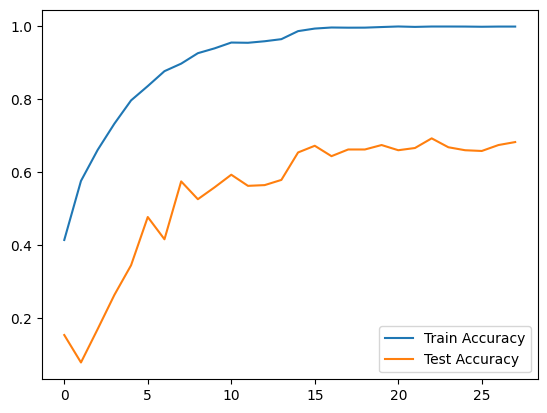

In [123]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()

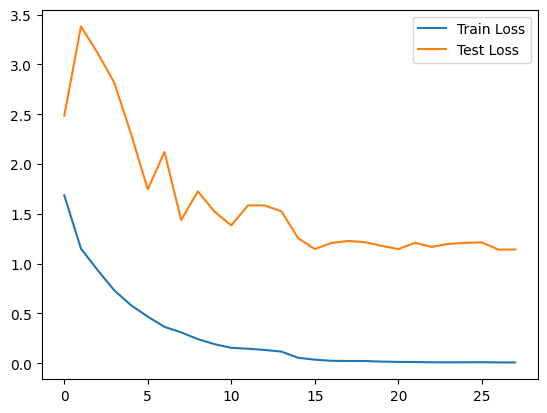

In [125]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Test Loss')
plt.legend()

In [129]:
pred=model.predict(C_testcnn)
prediction=ohe.inverse_transform(pred)
actual=ohe.inverse_transform(D_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


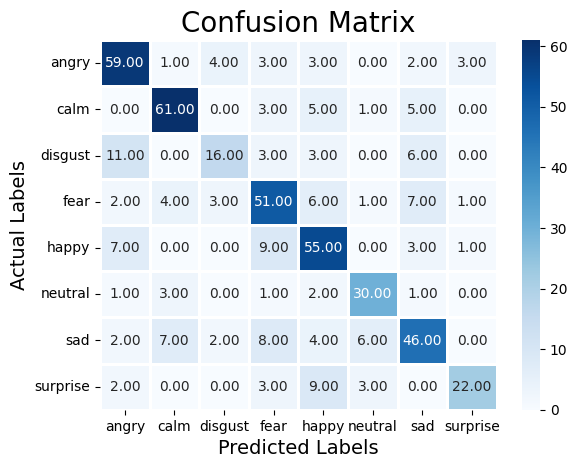

              precision    recall  f1-score   support

       angry       0.70      0.79      0.74        75
        calm       0.80      0.81      0.81        75
     disgust       0.64      0.41      0.50        39
        fear       0.63      0.68      0.65        75
       happy       0.63      0.73      0.68        75
     neutral       0.73      0.79      0.76        38
         sad       0.66      0.61      0.63        75
    surprise       0.81      0.56      0.67        39

    accuracy                           0.69       491
   macro avg       0.70      0.67      0.68       491
weighted avg       0.70      0.69      0.69       491



In [133]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(actual,prediction)
cm=pd.DataFrame(cm,index=[i for i in ohe.categories_],columns=[i for i in ohe.categories_])
sns.heatmap(cm,linecolor='white',cmap='Blues',linewidth=1,annot=True,fmt='.2f')
plt.title('Confusion Matrix',size=20)
plt.xlabel('Predicted Labels',size=14)
plt.ylabel('Actual Labels',size=14)
plt.show()
print(classification_report(actual,prediction))

Saving Model

In [151]:
model_json=model.to_json()
with open('emotion_model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights('emotion_model.weights.h5')

In [153]:
model.save('Full_Emotion_Model.keras')

In [157]:
import pickle
with open('One_Hot_Encoding.pickle', 'wb') as f:
    pickle.dump(ohe,f)
with open('Standard_Scaler.pickle', 'wb') as f1:
    pickle.dump(ss,f1)